In [1]:
pip install ISLP

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   ----------- ---------------------------- 1.0/3.6 MB 12.7 MB/s eta 0:00:01
   ----------------------- ---------------- 2.1/3.6 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 3.6/3.6 MB 7.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ---------------------------------------- 4.0/4.0 MB 26.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/832.4 kB ? eta -:--:--
   --------------------------------------- 832.4/832.4 kB 38.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/241.4 MB ? eta -:--:--
   - -------------------------------------- 11.0/241.4 MB 52.9 MB/s eta 0:00:05
   ---- ----------------------------------- 27.0/241.4 MB 63.4 MB/s eta 0:00:04
   ------- -------------------------------- 43.5/241.4 MB 67.5 MB/s eta 

(a) To begin, load in the Boston data set, which is part of the ISLP
library.

In [4]:
from ISLP import load_data

Boston = load_data('Boston')

(b) How many rows are in this data set? How many columns? What
do the rows and columns represent?

In [7]:
print(Boston.shape)
print(Boston.columns)
print(Boston.index)

(506, 13)
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')
RangeIndex(start=0, stop=506, step=1)


(c) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

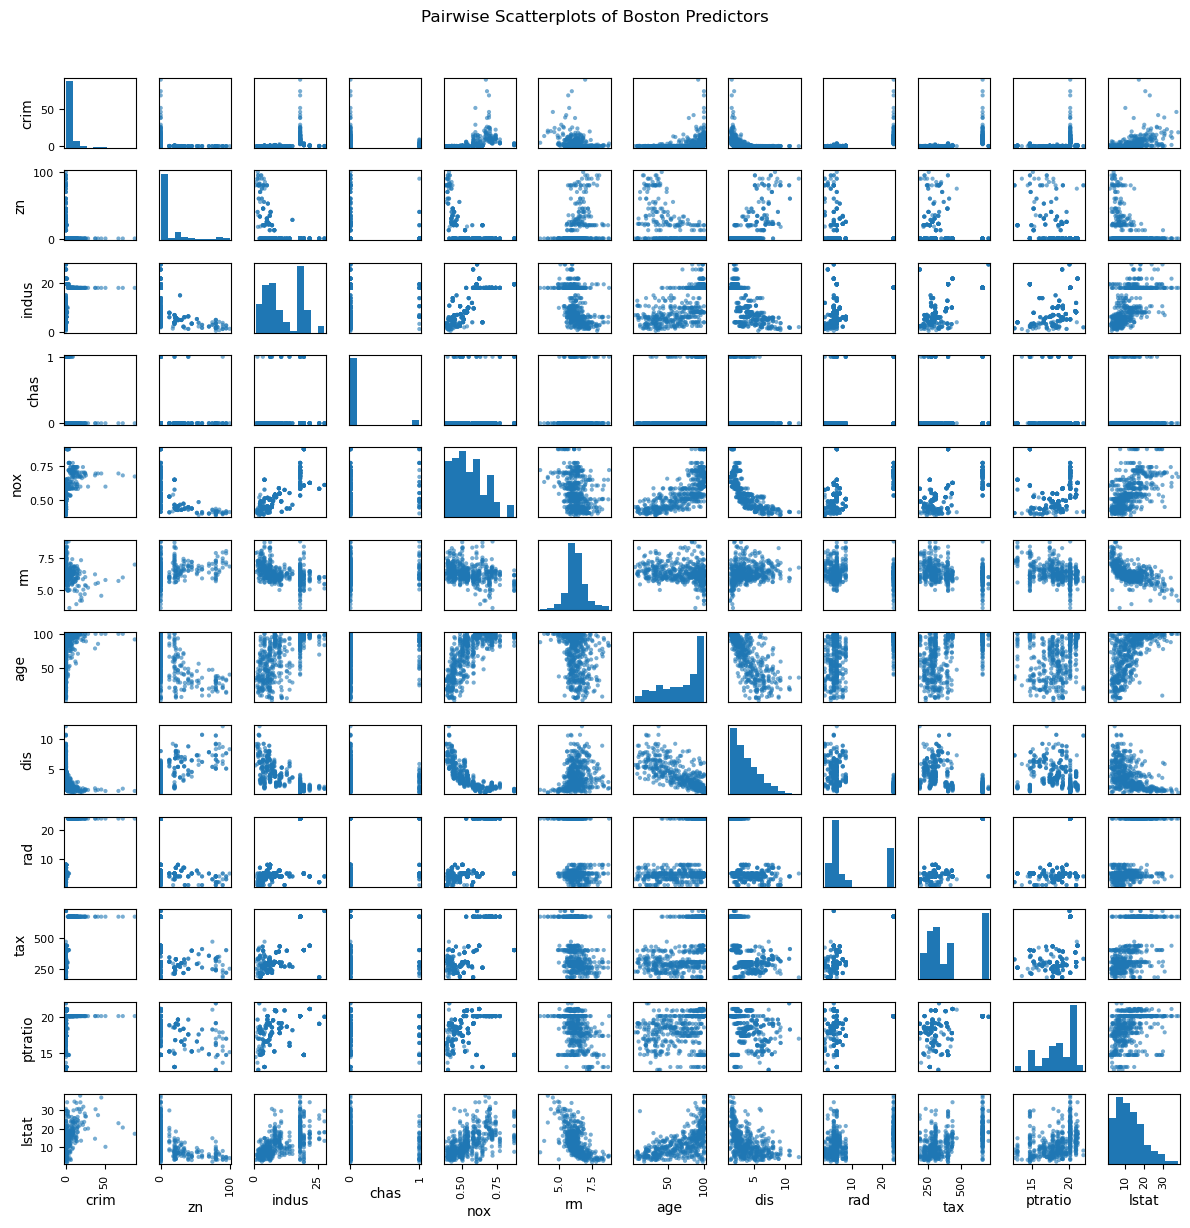

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

x = Boston.drop(columns=['medv'])

axes = pd.plotting.scatter_matrix(
    x, 
    figsize=(12,12), 
    diagonal="hist", 
    marker='.', 
    alpha=0.6
)

plt.suptitle("Pairwise Scatterplots of Boston Predictors",y=1.02)
plt.tight_layout()
plt.show()

(d) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

In [18]:
x = x.select_dtypes(include='number')

# 計算與 crim 的相關（移除「crim 對自己」的 1.0）
pearson  = x.corr(numeric_only=True)['crim'].drop(labels='crim', errors='ignore')
spearman = x.corr(method='spearman', numeric_only=True)['crim'].drop(labels='crim', errors='ignore')

# 合併成表並排序
corr_tbl = pd.concat([pearson, spearman], axis=1)
corr_tbl.columns = ['pearson', 'spearman']
corr_tbl = (
    corr_tbl
      .assign(abs_pearson=lambda d: d['pearson'].abs())
      .sort_values('abs_pearson', ascending=False)
      .drop(columns='abs_pearson')
      .round(3)
)

print("Correlation with per-capita crime rate (crim):")
print(corr_tbl)

Correlation with per-capita crime rate (crim):
         pearson  spearman
rad        0.626     0.728
tax        0.583     0.729
lstat      0.456     0.635
nox        0.421     0.821
indus      0.407     0.736
dis       -0.380    -0.745
age        0.353     0.704
ptratio    0.290     0.465
rm        -0.219    -0.309
zn        -0.200    -0.572
chas      -0.056     0.042


Positive associations (higher → higher crime):

1.rad 
2.tax 
3.lstat
4.nox 
5.indus
6.age
7.ptratio

Negative associations (higher → lower crime):

1.dis 
2.rm
3.zn
4.chas

(e) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

In [20]:
df = Boston.copy()

focus = ['crim', 'tax', 'ptratio']

qs = df[focus].quantile([0.90, 0.95, 0.99]).T
qs.columns = ['p90', 'p95', 'p99']

def top_extremes(col, q='p99', topn=10):
    thr = qs.loc[col, q]
    top = df[df[col] >= thr].sort_values(col, ascending=False)[[col]]
    print(f"\n=== {col}: rows at/above {q} threshold (≥ {thr:.3f}) ===")
    print(top.head(topn))

for col in focus:
    top_extremes(col, q='p99', topn=10)   # change q to 'p95' if you want a broader set


summary = df[focus].agg(['min','median','mean','max']).T.join(qs)
print("\n=== Summary for crim / tax / ptratio ===")
print(summary.round(3))


preds = df.drop(columns=['medv']).select_dtypes(include='number')
ranges = preds.agg(['min','max']).T
ranges['range'] = ranges['max'] - ranges['min']
print("\n=== Range (min–max) for each numeric predictor ===")
print(ranges.round(3).sort_values('range', ascending=False))


=== crim: rows at/above p99 threshold (≥ 41.370) ===
        crim
380  88.9762
418  73.5341
405  67.9208
410  51.1358
414  45.7461
404  41.5292

=== tax: rows at/above p99 threshold (≥ 666.000) ===
     tax
492  711
491  711
490  711
489  711
488  711
449  666
443  666
444  666
445  666
446  666

=== ptratio: rows at/above p99 threshold (≥ 21.200) ===
     ptratio
355     22.0
354     22.0
136     21.2
141     21.2
140     21.2
139     21.2
138     21.2
137     21.2
127     21.2
128     21.2

=== Summary for crim / tax / ptratio ===
             min   median     mean      max      p90      p95     p99
crim       0.006    0.257    3.614   88.976   10.753   15.789   41.37
tax      187.000  330.000  408.237  711.000  666.000  666.000  666.00
ptratio   12.600   19.050   18.456   22.000   20.900   21.000   21.20

=== Range (min–max) for each numeric predictor ===
             min      max    range
tax      187.000  711.000  524.000
zn         0.000  100.000  100.000
age        2.900  100.0

In [24]:
desc = preds.describe().T[['min','25%','50%','75%','max']]
desc['IQR']   = desc['75%'] - desc['25%']
desc['range'] = desc['max'] - desc['min']

out = desc.sort_values('range', ascending=False).round(3)
print(out)

             min      25%      50%      75%      max      IQR    range
tax      187.000  279.000  330.000  666.000  711.000  387.000  524.000
zn         0.000    0.000    0.000   12.500  100.000   12.500  100.000
age        2.900   45.025   77.500   94.075  100.000   49.050   97.100
crim       0.006    0.082    0.257    3.677   88.976    3.595   88.970
lstat      1.730    6.950   11.360   16.955   37.970   10.005   36.240
indus      0.460    5.190    9.690   18.100   27.740   12.910   27.280
rad        1.000    4.000    5.000   24.000   24.000   20.000   23.000
dis        1.130    2.100    3.207    5.188   12.126    3.088   10.997
ptratio   12.600   17.400   19.050   20.200   22.000    2.800    9.400
rm         3.561    5.885    6.208    6.624    8.780    0.738    5.219
chas       0.000    0.000    0.000    0.000    1.000    0.000    1.000
nox        0.385    0.449    0.538    0.624    0.871    0.175    0.486


(f) How many of the suburbs in this data set bound the Charles
river?

In [26]:
n_river = (Boston['chas']==1).sum()
print("Suburbs bounding the Charles River:", int(n_river))

Suburbs bounding the Charles River: 35


(g) What is the median pupil-teacher ratio among the towns in this
data set?

In [28]:
print(Boston['ptratio'].median())

19.05


(h) Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [31]:
import numpy as np
df = Boston.copy()

min_medv = df['medv'].min()
rows_min = df.index[df['medv'] == min_medv].tolist()
print(f"Lowest MEDV = {min_medv}; #suburbs = {len(rows_min)}; indices = {rows_min}")

predictors = [c for c in df.columns if c != 'medv']

overall = df[predictors].agg(['min','max']).T
overall['range'] = (overall['max'] - overall['min']).replace(0, np.nan)  # 避免除以 0

def profile_row(idx: int) -> pd.DataFrame:
    row_vals = df.loc[idx, predictors]
    pct_rank = df[predictors].rank(pct=True).loc[idx]
    out = pd.DataFrame({
        'value': row_vals,
        'min': overall['min'],
        'max': overall['max'],
        'range': overall['range'],
        'pct_rank': pct_rank * 100
    })
    out['pos_in_range_%'] = ((out['value'] - out['min']) / out['range'] * 100).clip(0, 100)
    return out

for idx in rows_min:
    print("\n" + "="*80)
    town = df.loc[idx, 'town'] if 'town' in df.columns else None
    title = f"Suburb with lowest MEDV -> index: {idx}"
    if town is not None:
        title += f" | town: {town}"
    print(title)

    prof = profile_row(idx).round(3)
    print(prof.to_string())

    top10 = prof.index[prof['pct_rank'] >= 90].tolist()
    bot10 = prof.index[prof['pct_rank'] <= 10].tolist()
    print("\nTop-decile (>= 90th percentile):", top10 if top10 else "None")
    print("Bottom-decile (<= 10th percentile):", bot10 if bot10 else "None")


Lowest MEDV = 5.0; #suburbs = 2; indices = [398, 405]

Suburb with lowest MEDV -> index: 398
           value      min      max    range  pct_rank  pos_in_range_%
crim      38.352    0.006   88.976   88.970    98.814          43.099
zn         0.000    0.000  100.000  100.000    36.858           0.000
indus     18.100    0.460   27.740   27.280    75.791          64.663
chas       0.000    0.000    1.000    1.000    46.640           0.000
nox        0.693    0.385    0.871    0.486    84.486          63.374
rm         5.453    3.561    8.780    5.219     7.708          36.252
age      100.000    2.900  100.000   97.100    95.850         100.000
dis        1.490    1.130   12.126   10.997     5.731           3.274
rad       24.000    1.000   24.000   23.000    87.055         100.000
tax      666.000  187.000  711.000  524.000    86.067          91.412
ptratio   20.200   12.600   22.000    9.400    75.198          80.851
lstat     30.590    1.730   37.970   36.240    97.826          79.6

(i) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [ ]:
df = Boston.copy()


n_gt7 = (df['rm'] > 7).sum()
n_gt8 = (df['rm'] > 8).sum()
N = len(df)
print(f"Suburbs with rm > 7: {n_gt7}  ({n_gt7/N:.1%})")
print(f"Suburbs with rm > 8: {n_gt8}  ({n_gt8/N:.1%})")

gt8 = df[df['rm'] > 8].copy()
cols_show = ['rm','medv','lstat','crim','nox','dis','rad','tax','ptratio']
cols_show = [c for c in cols_show if c in gt8.columns]  # 以防某些欄位版本略有不同
print("\nRows with rm > 8 (sorted by rm):")
print(gt8[cols_show].sort_values('rm', ascending=False).to_string(index=True))

cols_cmp = [c for c in ['medv','lstat','crim','nox','dis','rad','tax','ptratio'] if c in df.columns]
overall = df[cols_cmp].describe().T[['mean','50%']].rename(columns={'50%':'median'})
gt8_sum = gt8[cols_cmp].describe().T[['mean','50%']].rename(columns={'50%':'median'})
compare = gt8_sum.join(overall, lsuffix='_gt8', rsuffix='_all')
print("\nCompare (rm > 8 subset vs overall):")
print(compare.round(2))

Suburbs with rm > 7: 64  (12.6%)
Suburbs with rm > 8: 13  (2.6%)

Rows with rm > 8 (sorted by rm):
        rm  medv  lstat     crim     nox     dis  rad  tax  ptratio
364  8.780  21.9   5.29  3.47428  0.7180  1.9047   24  666     20.2
225  8.725  50.0   4.63  0.52693  0.5040  2.8944    8  307     17.4
257  8.704  50.0   5.12  0.61154  0.6470  1.8010    5  264     13.0
262  8.398  48.8   5.91  0.52014  0.6470  2.2885    5  264     13.0
163  8.375  50.0   3.32  1.51902  0.6050  2.1620    5  403     14.7
232  8.337  41.7   2.47  0.57529  0.5070  3.8384    8  307     17.4
267  8.297  50.0   7.44  0.57834  0.5750  2.4216    5  264     13.0
224  8.266  44.8   4.14  0.31533  0.5040  2.8944    8  307     17.4
253  8.259  42.8   3.54  0.36894  0.4310  8.9067    7  330     19.1
233  8.247  48.3   3.95  0.33147  0.5070  3.6519    8  307     17.4
97   8.069  38.7   4.21  0.12083  0.4450  3.4952    2  276     18.0
226  8.040  37.6   3.13  0.38214  0.5040  3.2157    8  307     17.4
204  8.034  50.0 

Suburbs averaging more than eight rooms per dwelling are few and tend to be affluent, with higher home values and lower lstat, and typically exhibit lower pollution/crime. Their characteristics are consistent with large-lot, suburban areas.”